In [11]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = "/content/drive/My Drive/imageClassification "

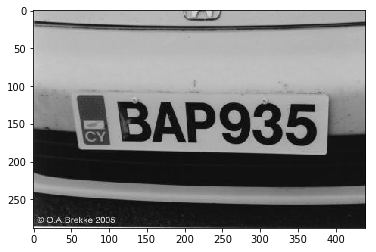

In [21]:
CATEGORIES = ["plate_number", "negative_image"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [22]:
print(img_array)

[[214 198 193 ... 176 177 178]
 [214 198 193 ... 176 177 178]
 [214 198 193 ... 176 177 178]
 ...
 [113  57  54 ...  23  25  28]
 [213 185 182 ...  26  29  31]
 [254 255 255 ...  28  31  34]]


In [0]:
print(img_array.shape)

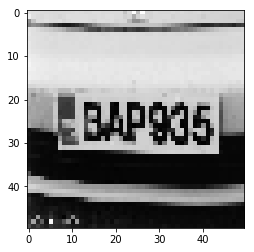

In [23]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [24]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create_training_data()

print(len(training_data))

100%|██████████| 50/50 [00:21<00:00,  1.71it/s]

76


In [0]:
import random

random.shuffle(training_data)

In [0]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [0]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [29]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

model = Sequential()

model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model.add(Dense(64))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(X, y, batch_size=32, epochs=10, validation_split=0.3)

Train on 53 samples, validate on 23 samples
Epoch 1/10
53/53 [==============================] - 3s 51ms/sample - loss: 1.0491 - acc: 0.6226 - val_loss: 0.9262 - val_acc: 0.3043
Epoch 2/10
53/53 [==============================] - 3s 49ms/sample - loss: 0.7237 - acc: 0.3962 - val_loss: 0.6175 - val_acc: 1.0000
Epoch 3/10
53/53 [==============================] - 3s 47ms/sample - loss: 0.6001 - acc: 0.8302 - val_loss: 0.5317 - val_acc: 0.7391
Epoch 4/10
53/53 [==============================] - 3s 47ms/sample - loss: 0.5800 - acc: 0.7170 - val_loss: 0.5010 - val_acc: 1.0000
Epoch 5/10
53/53 [==============================] - 3s 48ms/sample - loss: 0.4615 - acc: 0.9245 - val_loss: 0.3441 - val_acc: 1.0000
Epoch 6/10
53/53 [==============================] - 3s 49ms/sample - loss: 0.3280 - acc: 0.9623 - val_loss: 0.2863 - val_acc: 0.9565
Epoch 7/10
53/53 [==============================] - 3s 48ms/sample - loss: 0.2279 - acc: 0.9623 - val_loss: 0.2128 - val_acc: 0.9565
Epoch 8/10
53/53 [=======